Buy some assets and short some other assets . There should be 3 or more assets in the portfolio.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import yfinance as yf
from finquant.portfolio import build_portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Let's stat with importing price data for the selected stocks. 

In [2]:
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2023-04-01")

pfizer_df = yf.download(
    "PFE", 
    start = start_date, 
    end = end_date
)["Adj Close"].rename("Pfizer")

amazon_df = yf.download(
    "AMZN", 
    start = start_date, 
    end = end_date
)["Adj Close"].rename("Amazon")

enph_df = yf.download(
    "ENPH", 
    start = start_date, 
    end = end_date
)["Adj Close"].rename("Enphase Energy Inc")

mastercard_df = yf.download(
    "MA", 
    start = start_date, 
    end = end_date
)["Adj Close"].rename("Mastercard")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Compbine all stock prices into a single Data Frame

In [3]:
stocks_list = [pfizer_df, amazon_df, enph_df, mastercard_df]

price_df = pd.concat(
    stocks_list, 
    axis=1
)

price_df.head()

,Pfizer,Amazon,Enphase Energy Inc,Mastercard
Date,,,,
2023-01-03,50.793686,85.820000,253.309998,345.695709
2023-01-04,49.673969,85.139999,251.639999,354.019165
2023-01-05,49.208244,83.120003,240.369995,350.649902
2023-01-06,50.456779,86.080002,233.649994,367.094116
2023-01-09,47.949795,87.360001,227.940002,370.388947


Visualizing individual stock prices. 

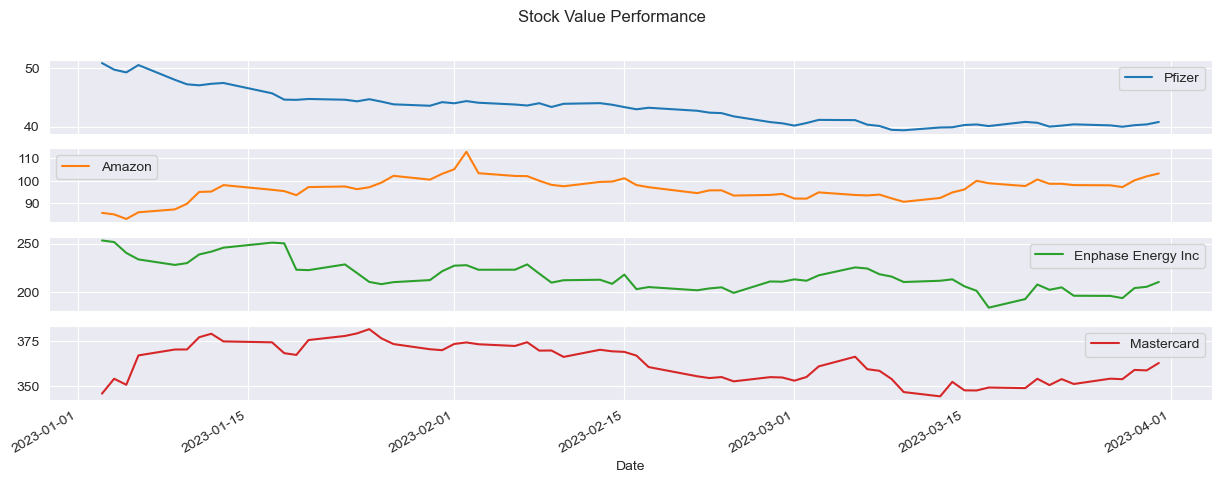

In [45]:
price_df.plot(
    figsize=(15, 5), 
    title="Stock Value Performance", 
    subplots=True, 
);

Visualizing all stock prices. 

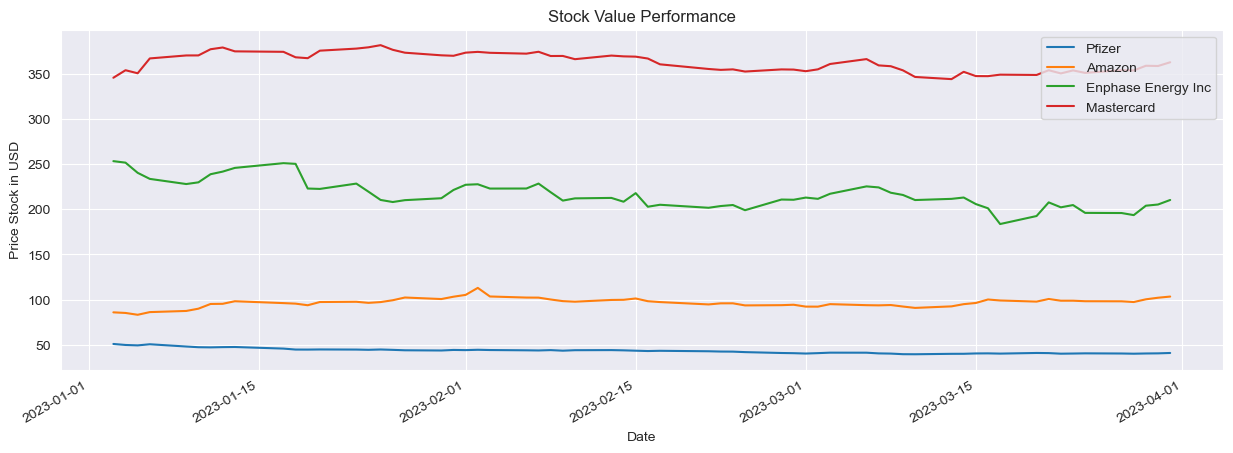

In [4]:
price_df.plot(figsize=(15, 5), title="Stock Value Performance")
plt.ylabel("Price Stock in USD");

The price of Amazon Stock is way superior compared to other assets. It's actually hard to compare the other assets because of the price difference. In order to visualize things better lets plot the returns. 

In [5]:
returns_df = price_df.pct_change()
returns_df.head()

,Pfizer,Amazon,Enphase Energy Inc,Mastercard
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,-0.022044,-0.007924,-0.006593,0.024077
2023-01-05,-0.009376,-0.023726,-0.044786,-0.009517
2023-01-06,0.025372,0.035611,-0.027957,0.046896
2023-01-09,-0.049686,0.014870,-0.024438,0.008975


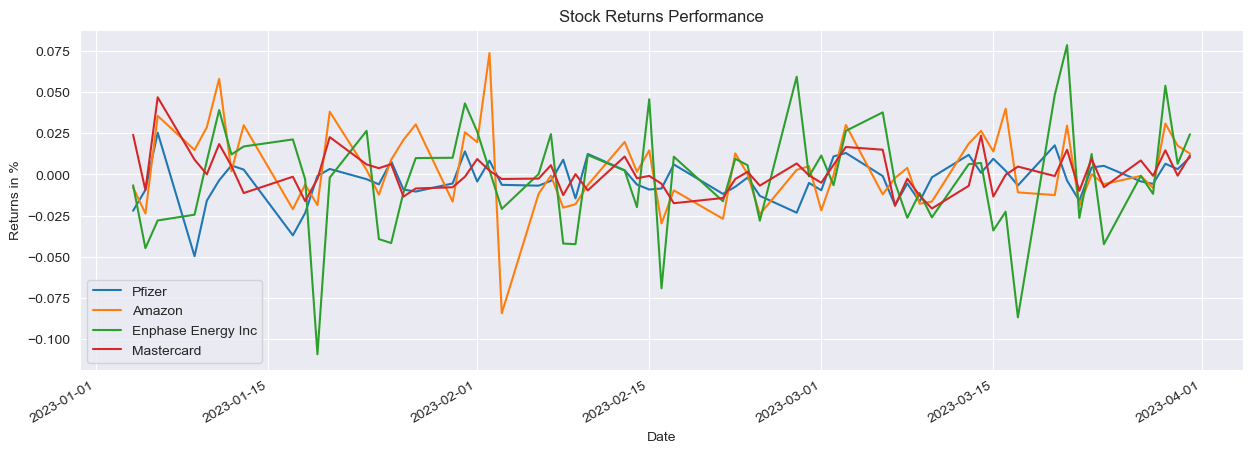

In [6]:
returns_df.plot(
    figsize=(15, 5), 
    title="Stock Returns Performance"
)
plt.ylabel("Returns in %");

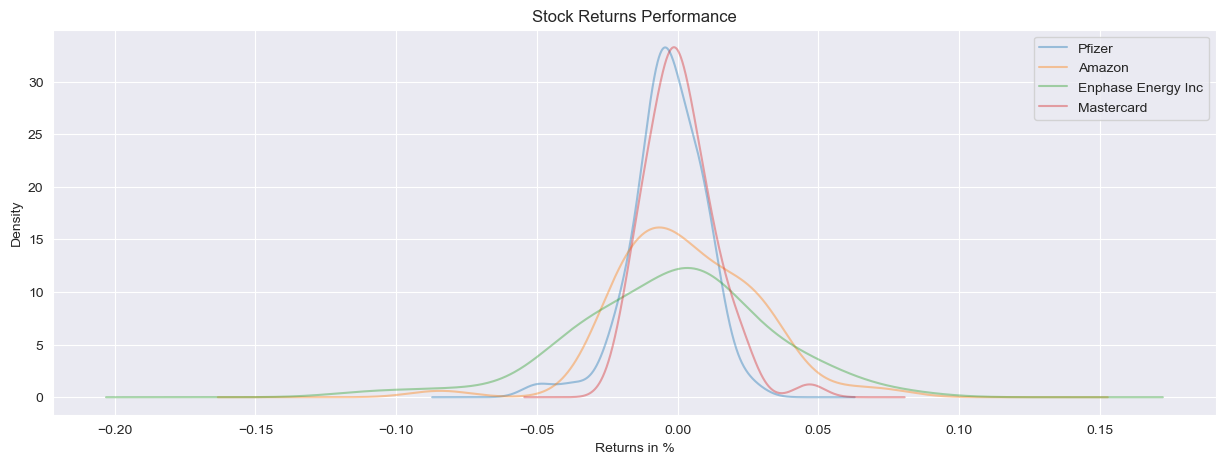

In [107]:
returns_df.plot(
    kind="kde",
    figsize=(15, 5), 
    title="Stock Returns Performance", 
    alpha=0.4
)
plt.xlabel("Returns in %");

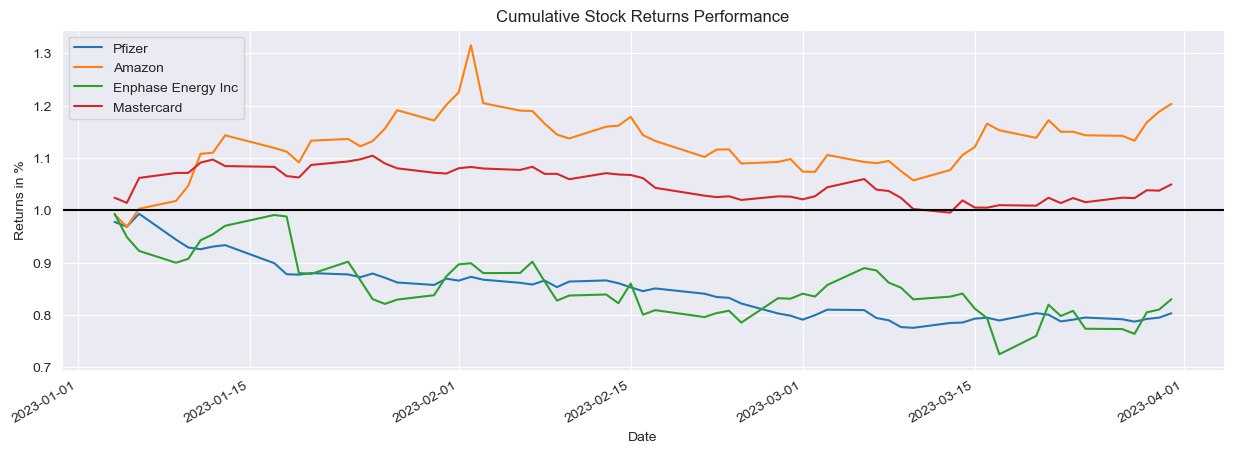

In [231]:
cum_returns_df = returns_df.dropna().add(1).cumprod()
cum_returns_df.plot(
    figsize=(15, 5), 
    title="Cumulative Stock Returns Performance", 
)
plt.axhline(y=1, color='black', linestyle='-')
plt.ylabel("Returns in %")
plt.xlabel("Date");

**Step 1** - For each investment, produce the given statistics: 
1. Average return 
2. Volatility 
3. Skewness 
4. Kurtosis 


In [93]:
print("Returns")
total_returns = (price_df.iloc[-1, :] / price_df.iloc[1, :]) - 1
total_returns

Returns


Pfizer               -0.178644
Amazon                0.213178
Enphase Energy Inc   -0.164362
Mastercard            0.024918
dtype: float64

In [34]:
print("Average Return")
returns_df.mean()

Average Return


Pfizer               -0.003505
Amazon                0.003340
Enphase Energy Inc   -0.002472
Mastercard            0.000867
dtype: float64

In [232]:
print("Volatility Stocks")
total_volatility = returns_df.std()
total_volatility

Volatility Stocks


Pfizer                0.012694
Amazon                0.024604
Enphase Energy Inc    0.033940
Mastercard            0.012233
dtype: float64

In [46]:
print("Skewdness")
price_df.skew()

Skewdness


Pfizer                0.865362
Amazon               -0.157981
Enphase Energy Inc    0.629892
Mastercard            0.018847
dtype: float64

In [47]:
print("Kurtosis")
price_df.kurtosis().add(3)

Kurtosis


Pfizer                3.212257
Amazon                4.505294
Enphase Energy Inc    3.114344
Mastercard            1.665299
dtype: float64

**Also, compute the correlation and covariance matrix of historical returns.**


In [12]:
correlation_portfolio = returns_df.corr()
covariance_portfolio = returns_df.cov()

In [13]:
correlation_portfolio

,Pfizer,Amazon,Enphase Energy Inc,Mastercard
Pfizer,1.000000,0.289982,0.090064,0.217136
Amazon,0.289982,1.000000,0.383383,0.419235
Enphase Energy Inc,0.090064,0.383383,1.000000,0.246102
Mastercard,0.217136,0.419235,0.246102,1.000000


In [73]:
for column in returns_df.columns:
    print(f"{column}: {correlation_portfolio[column].nlargest(2)[1]:.3f}")

Pfizer: 0.290
Amazon: 0.419
Enphase Energy Inc: 0.383
Mastercard: 0.419


In [74]:
correlation_portfolio.min()

Pfizer                0.090064
Amazon                0.289982
Enphase Energy Inc    0.090064
Mastercard            0.217136
dtype: float64

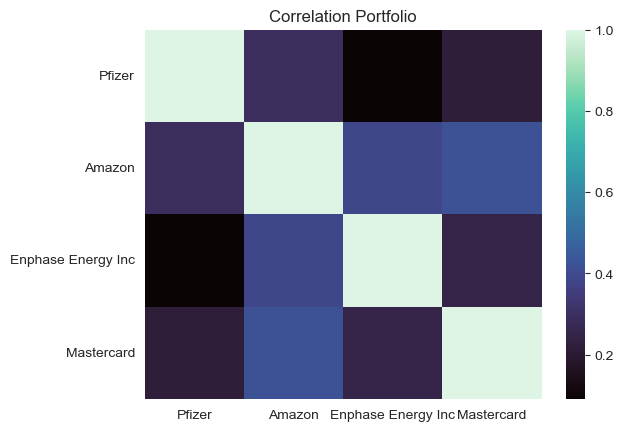

In [14]:
sns.heatmap(correlation_portfolio, cmap="mako")
plt.title("Correlation Portfolio");

In [15]:
covariance_portfolio

,Pfizer,Amazon,Enphase Energy Inc,Mastercard
Pfizer,0.000161,0.000091,0.000039,0.000034
Amazon,0.000091,0.000605,0.000320,0.000126
Enphase Energy Inc,0.000039,0.000320,0.001152,0.000102
Mastercard,0.000034,0.000126,0.000102,0.000150


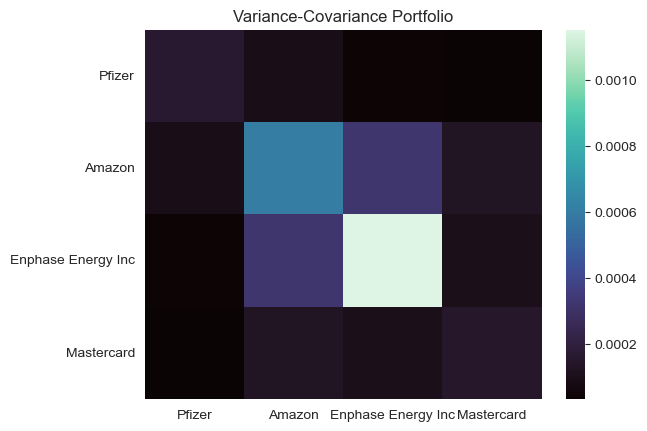

In [16]:
sns.heatmap(covariance_portfolio, cmap="mako")
plt.title("Variance-Covariance Portfolio");

Step 2 - Answer the following questions: 

1. Shorting 

    a. Can this portfolio be sold short?
    
    **Answer:** Since some expected returns are negative and some others are positive, that gives us a hint that we can have a combined strategy that includes short positions. 
    
    b. If it can be sold short, walk through the mechanics. 
    
    **Answer:** It is possible that we can maximize the return of the portfolio by having a long position on positive returns and short position in negative returns. Besides, this strategy can be beneficial in case there is systematic risk and all stocks go down for some external reason (like a pandemic). 

2. Credit Risk 

    a. Does this portfolio have credit risk? 
    **Answer:** The portfolio was built using big companies from Standard & Poor 500, the risk of credit ristk isn't zero but they are big companies with a risk close to nothing.

3. Portfolio Statistics 

    a. Compute the weighted return of the portfolio. 
    
    b. Compute the variance of the portfolio. 


In [49]:
# Calculate expected returns and sample covariance
portfolio_returns = expected_returns.mean_historical_return(price_df)
portfolio_sample_covariance = risk_models.sample_cov(price_df)

ef = EfficientFrontier(
    portfolio_returns, 
    portfolio_sample_covariance, 
    weight_bounds=(-1,1)
)

weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 194.8%
Annual volatility: 44.3%
Sharpe Ratio: 4.36


(1.94791646757822, 0.44258912773717896, 4.355995994377583)

There is a strategy called the efficient frontier that provides the right combination of weights in the portfolio that will maximize sharp ratio. The bounds were set from -1 to 1, this makes possible go short in some stocks in case this maximizes teh overall performance.

Next, here are the optimal weights for each stock for the maximum sharpe ratio: 

In [50]:
print("Optimal Portfolio Weights")
weights

Optimal Portfolio Weights


OrderedDict([('Pfizer', -0.6789750650405099),
             ('Amazon', 0.9999999999999998),
             ('Enphase Energy Inc', -0.32102493495949),
             ('Mastercard', 1.0)])


4. Diversification

    a. Describe the diversification in words between the two assets.
    **Answer:** All companies present a good correlation score with Amazon, this score doesn't go up from 0.5, so it's not so bad. Pfizer comes from healthcare industry in is sligltly correlated with Amazon with a score of 0.29, the other stocks present a lower correlation. Mastercard, depite being a finance company has a good correlation score with Amazon as well 0.41. Enphase Energy Inc comes from the energy industry and presents a correlation of 0.38. All those nombers are closer to zero than to 1, which is great for the overall portfolio. 

    b. Do you think this portfolio is well diversified or not? 
    **Answer:** I think it has very good diversification, the stocks were selected from different sectors and correlation doesn't go up to 0.5 in any case. The best scenarios are were negative correlation between assets but unfortunately this didn't happend in this portfolio.

5. Comparing Portfolios 

    a. How does your portfolio compare to the others in terms of risk? 
    
    b. How does your portfolio compare to the others in terms of return? 


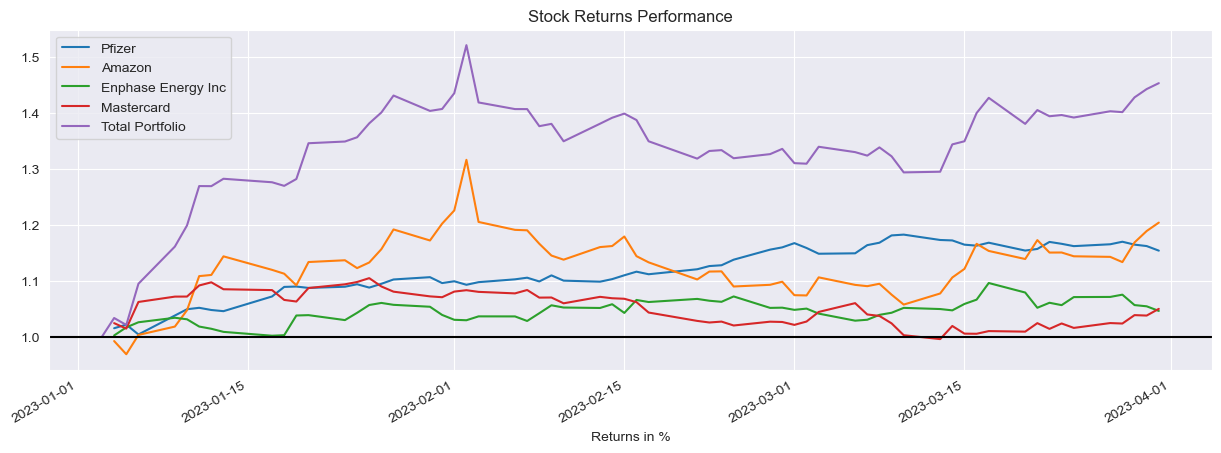

In [219]:
weighted_portfolio = returns_df.multiply(weights).add(1).cumprod()
weighted_portfolio["Total Portfolio"]  = weighted_portfolio.subtract(1).sum(axis=1).add(1)

weighted_portfolio.plot(
    figsize=(15, 5), 
    title="Stock Returns Performance", 
)
plt.axhline(y=1, color='black', linestyle='-')
plt.xlabel("Returns in %");

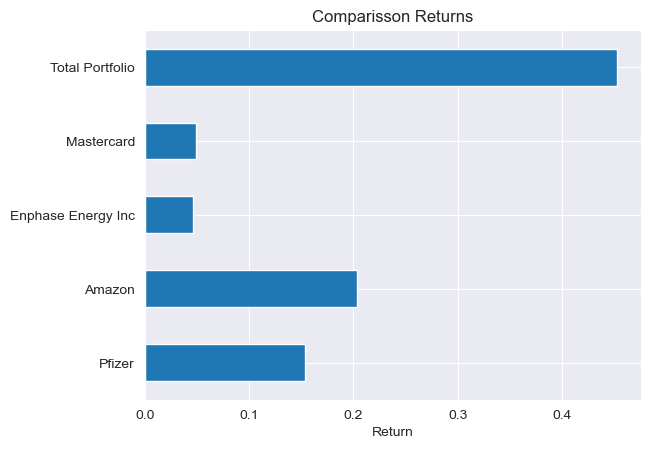

In [225]:
final_portfolio_return = weighted_portfolio.iloc[-1].subtract(1)

final_portfolio_return.plot.barh()
plt.title("Comparisson Returns")
plt.xlabel("Security")
plt.xlabel("Return");

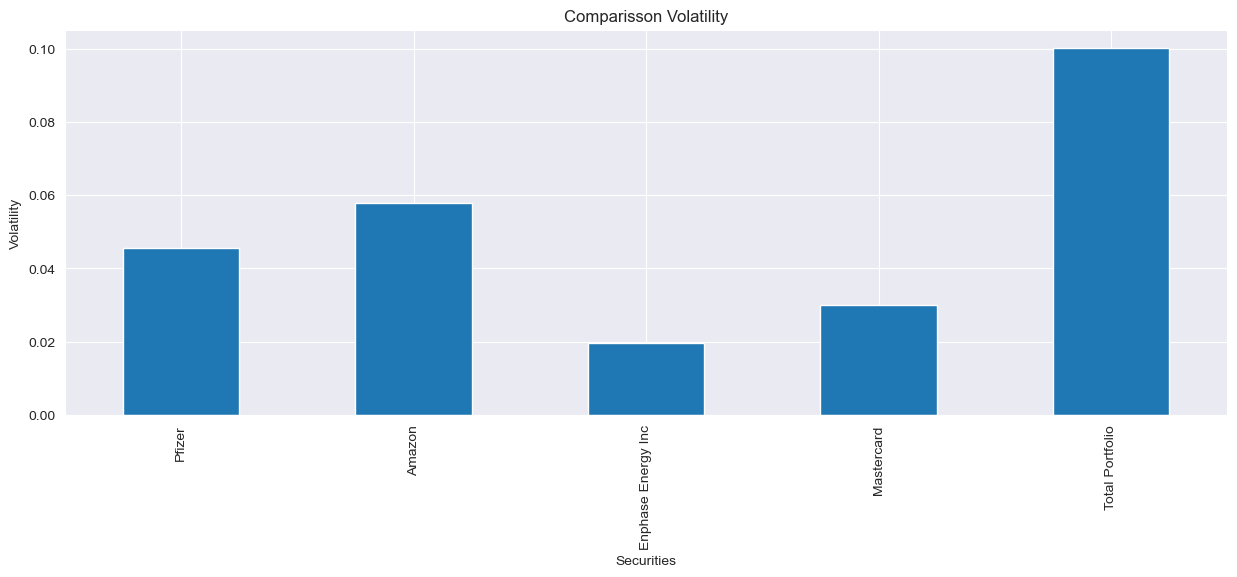

In [235]:
#returns_df.multiply(weights).add(1).cumprod().plot()
weighted_portfolio.std().plot.bar(
    figsize=(15, 5), 
    title="Comparisson Volatility"
)
plt.xlabel("Securities")
plt.ylabel("Volatility");

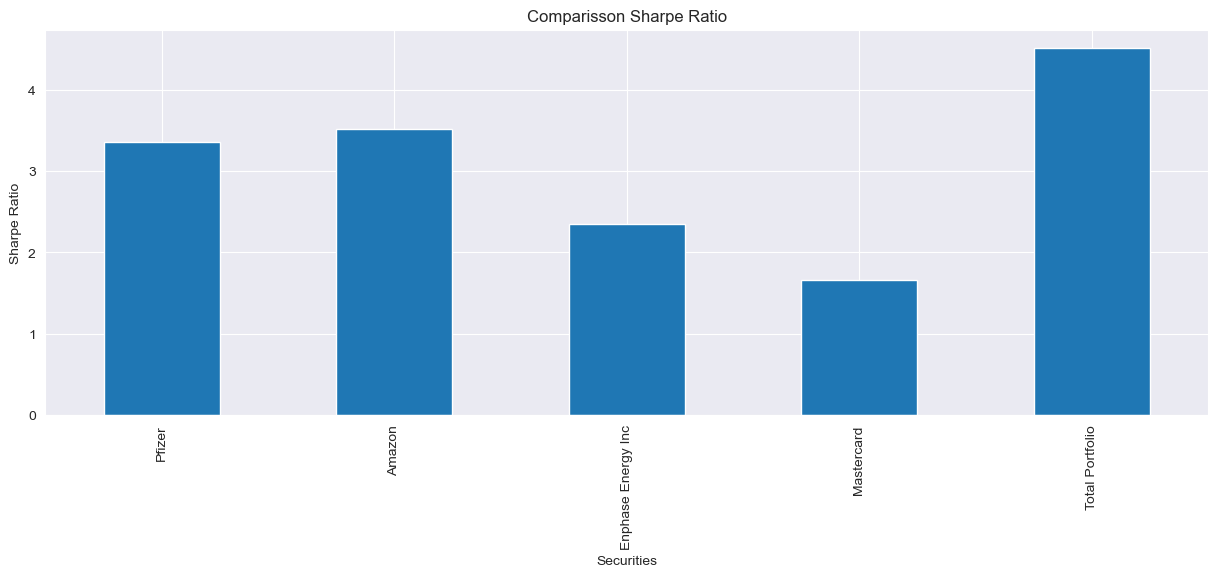

In [238]:
sharpe_ratio_portfolio = final_portfolio_return.divide(weighted_portfolio.std())

sharpe_ratio_portfolio.plot.bar(
    figsize=(15, 5), 
    title="Comparisson Sharpe Ratio"
)
plt.xlabel("Securities")
plt.ylabel("Sharpe Ratio");


6. Assessing Risk 

    a. Describe economic conditions or scenarios that would affect your security. For example, the COVID-19 pandemic could disrupt travel and halt the production of new aircraft, hurting the demand for airline parts. (Note: this particular example CANNOT be used!) 
    
    **Answer:** The portfolio es expose to some idiosyncratic risk, maybe a failure in a product in any of the company, a law suite or some cyber security brach that the organizations are responsible for. 
    
    b. Determine if similar events would hurt one or both members of a portfolio. 
    **Answer:** Systematic risk like a pandemic could definetely hurt most of the assets, except Pfizer that is related to the health industry. 
    
7. Performance 
    
    a. Now describe economic conditions or scenarios that would greatly improve each security. For example, increased business and vacation travel could increase the demand for airline parts (Note: this particular example CANNOT be used!) 
    
    - Pfizer: Creation of a new vaccine for a letal disease. 
    - Amazon: Opening a new line of products.
    - Enphase Energy Inc: Inrease in the worlwide price of petroleum.
    - Mastercard: the banckruptcy of a major competitor or mastercard, like Visa. 
    
    b. Determine if similar events would help one or both members of a portfolio. 
    
    **Answer:** Not really, those events can't affect other stocks at the same time. 

8. Disrupters 

    a. List the potential influence the central bank may have on the portfolio. 
    
    **Answer:** Increase in the interest rates could create inflation and affect how financial institutions such as Mastercard are managing risk.
    
    b. List the potential influence that investment banks may have on the portfolio. 
    
    **Answer:** Investment banks could 


9. Re-assessing Risk 

    a. Do the two investments in the portfolio have the same skew? 

    **Answer:** Skewdness scores are different for all assets. 

    
    b. Is there a difference between the types of correlation? 
    
    **Answer:** Amazon is mostly related to all the other companies, but not with a correlation score larger than 0.5.

